# Matplotlib: Graphing and Plotting in Python

## Objectives

- Import `pyplot` and set up a professional style.
- Create `fig` and `ax` or `axs` objects with `plt.subplots`.
- Make titles and labels.
- Draw scatterplots on an axis.
- Draw line plots on an axis.
- Draw a bar chart on an axis.
- Some shortcuts for common tasks from Pandas.

## Standard Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


The default style in matplotlib is unattractive and not color blind friendly, so I recommend always switching to a more professional style.

In [2]:
plt.style.use('ggplot')

## Figures and Axis

The basic components in `pyplot` are **figures** and **axes**.

  - A **figure** object represents the entire image.
  - Am **axis** object represents a drawing area.
  
A single image can contain multiple drawing areas!  This is useful!

Figures and axies can be flexibly created with the `plt.subplots` function.

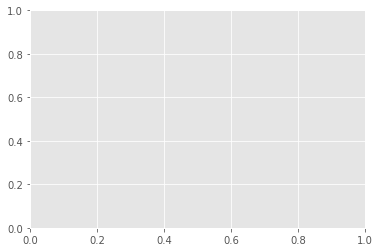

In [5]:
fig, ax = plt.subplots()

We can change the size of the image using the `figsize` argument.

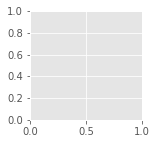

In [6]:
fig, ax = plt.subplots(figsize=(2, 2))

We can also use `plt.subplots` to create a figure with **multiple** axes.

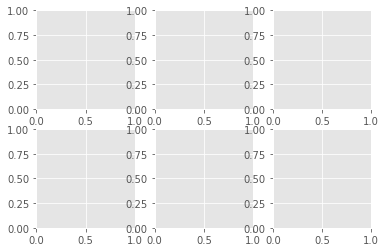

In [8]:
fig, axs = plt.subplots(2, 3)

Notice that I use `ax` to refer to a *single* axis, and *axs* to refer to *multiple* axes.  This is a style I picked up from functional programming, and it is very useful.

Calling `fig.tight_layout()` after creating a figure will clean up the display so things don't overlap.

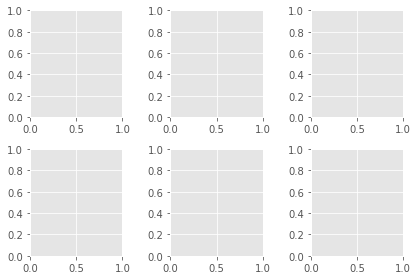

In [10]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout()

## Iterating Through Axes

When we have multiple axes, we would like some way to iterate through them and draw different images on each.

Here's how we can write some text to a single axis.

Text(0.1,0.4,'Ride The Lightning!')

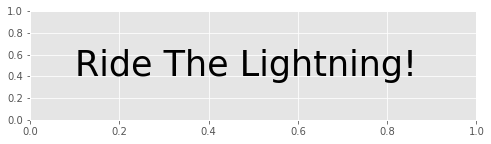

In [11]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.text(0.1, 0.4, "Ride The Lightning!", fontsize=35)

When we create multiple axes, they are stored in a multi-dimensional numpy array.  The usual case is in a 2-dimensional array, i.e, a matrix.

(2, 3)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x11efb57b8>


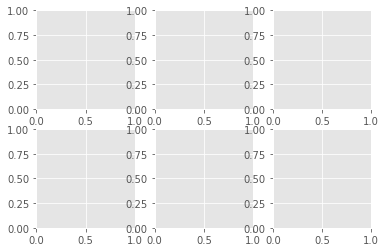

In [13]:
fig, axs = plt.subplots(2, 3)
print(axs.shape)
print(axs)

To iterate through all the different axes in turn, we can use the `flatten` method of a numpy array.

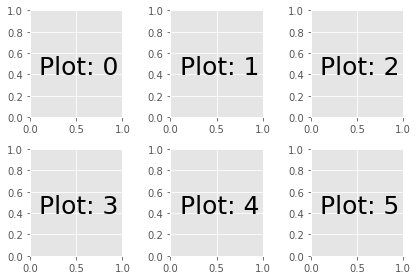

In [15]:
fig, axs = plt.subplots(2, 3)

for i, ax in enumerate(axs.flatten()):
    string_to_write = "Plot: {}".format(i)
    ax.text(0.1, 0.4, string_to_write, fontsize=25)
    #       ^ These were figured out through trial and error.
    
fig.tight_layout()

The `for i, ax in enumerate(axs.flatten())` is an extremely useful pattern when working with matplotlib.

## Titles and Labels

All professional plots should have titles and axis labels.  Here's how to make them.

Text(0.5,1,'This is a Great Plot!')

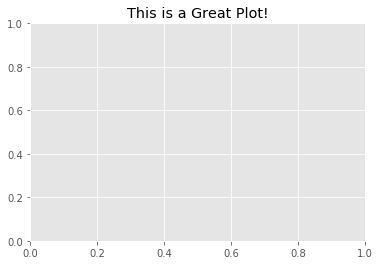

In [16]:
fig, ax = plt.subplots()
ax.set_title("This is a Great Plot!")

When using multiple axes, each axis can have its own title.

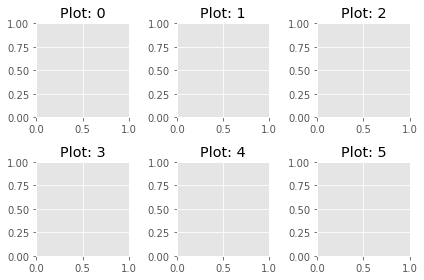

In [17]:
fig, axs = plt.subplots(2, 3)

for i, ax in enumerate(axs.flatten()):
    ax.set_title("Plot: {}".format(i))

fig.tight_layout()

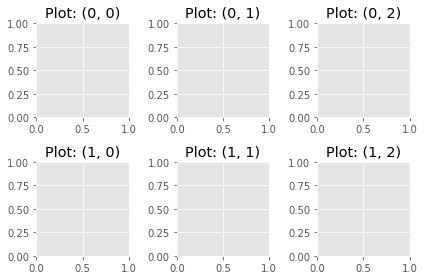

In [18]:
fig, axs = plt.subplots(2, 3)

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.set_title("Plot: {}".format((i, j)))
        
fig.tight_layout()

Axis labels use `ax.set_xlabel` and `ax.set_ylabel`.

Text(0,0.5,'This is a y-label!')

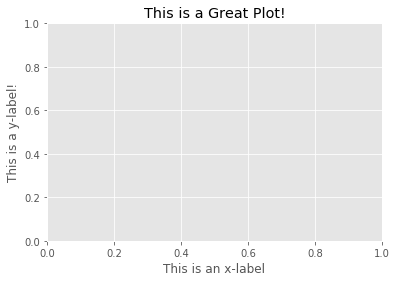

In [19]:
fig, ax = plt.subplots()
ax.set_title("This is a Great Plot!")
ax.set_xlabel("This is an x-label")
ax.set_ylabel("This is a y-label!")

You can display symbols and math in any title or label by including `latex` inside of dollar signs.

It's a good idea to use **raw strings** when including latex code, this makes it much easier to include curly brackets, which have meaning to both Python and latex.

Text(0,0.5,'$G_{\\mu \\nu} + \\Lambda g_{\\mu \\nu} = \\frac{8 \\pi G}{c^4} T_{\\mu \\nu}$')

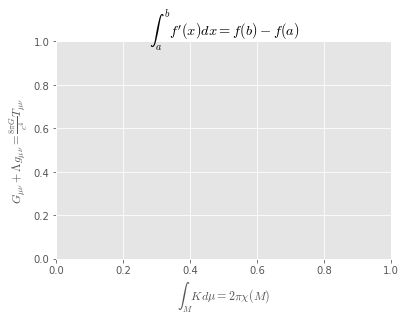

In [20]:
fig, ax = plt.subplots()
ax.set_title(r"$\int_a^b f'(x) dx = f(b) - f(a)$")
ax.set_xlabel(r"$\int_M K d\mu = 2 \pi \chi(M)$")
ax.set_ylabel(r"$G_{\mu \nu} + \Lambda g_{\mu \nu} = \frac{8 \pi G}{c^4} T_{\mu \nu}$")

## Drawing Scatterplots

Scatterplots are the queen of data visualizations.  They show all the data, and never lie.

The `scatter` method in `pyplot` makes simple scatterplots.

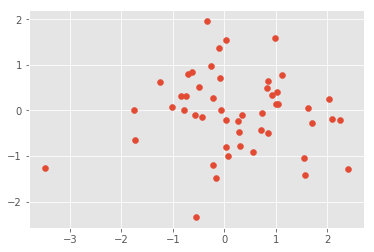

In [21]:
x = np.random.normal(size=50)
y = np.random.normal(size=50)

fig, ax = plt.subplots()
ax.scatter(x, y)

When there is a lot of data, adding transparency to the points can make the density more apparent.

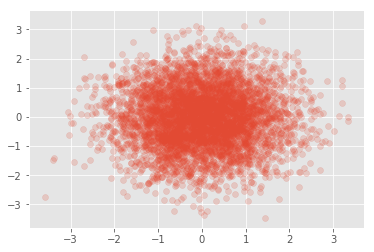

In [22]:
x = np.random.normal(size=5000)
y = np.random.normal(size=5000)

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.2)

### Example: Linear Regression Data

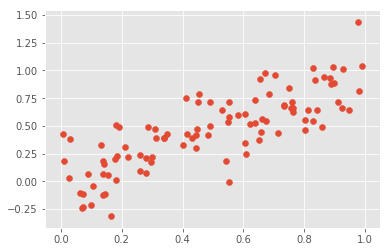

In [23]:
x = np.random.uniform(size=100)
y = 1.0*x + np.random.normal(scale=0.2, size=100)

fig, ax = plt.subplots()
ax.scatter(x, y)

### Example: Adding Color

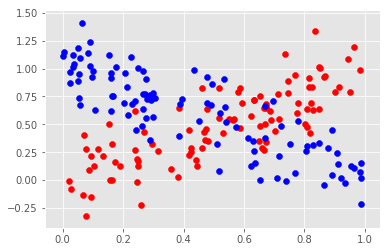

In [24]:
x_blue = np.random.uniform(size=100)
y_blue = 1.0*x_blue + np.random.normal(scale=0.2, size=100)

x_red = np.random.uniform(size=100)
y_red = 1.0 - 1.0*x_red + np.random.normal(scale=0.2, size=100)

fig, ax = plt.subplots()
ax.scatter(x_blue, y_blue, color="red")
ax.scatter(x_red, y_red, color="blue")

### Example: Linear Regression Data, Different Slopes

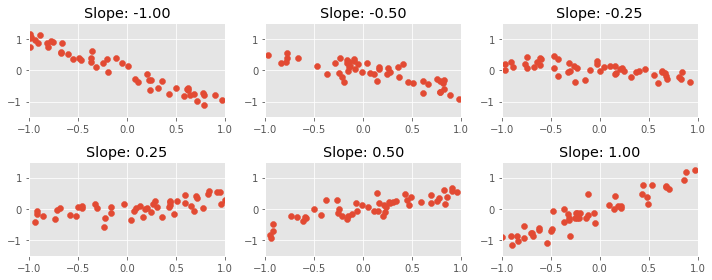

In [25]:
slopes = [-1.0, -0.5, -0.25, 0.25, 0.5, 1.0]

fig, axs = plt.subplots(2, 3, figsize=(10, 4))

for i, ax in enumerate(axs.flatten()):
    x = np.random.uniform(-1, 1, size=50)
    y = slopes[i]*x + np.random.normal(scale=0.2, size=50)
    ax.scatter(x, y)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title("Slope: {:2.2f}".format(slopes[i]))
    
fig.tight_layout()

## Drawing Line Plots

Line plots are almost as useful as scatterplots, they connect consecutive points in sequence by line segments.  Line plots can be made in `pyplot` using the `plot` method.

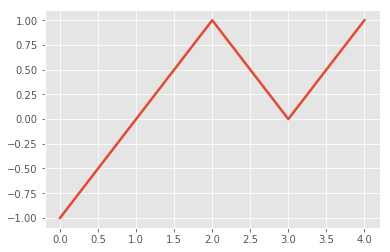

In [26]:
x = [0, 1, 2, 3, 4]
y = [-1, 0, 1, 0, 1]

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.5, zorder=2)

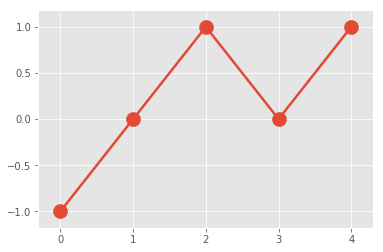

In [27]:
x = [0, 1, 2, 3, 4]
y = [-1, 0, 1, 0, 1]

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.5, zorder=2)
ax.scatter(x, y, s=200, zorder=1)

A very useful application for line plots is plotting the graph of a function.

To accomplish these, we need to set up a one dimensional grid of numbers using `np.linspace`.

In [28]:
np.linspace(0, 1, num=11)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

After setting up a fine enough grid, we can plot the graph of a function using:
    
```python
ax.plot(x, f(x))
```

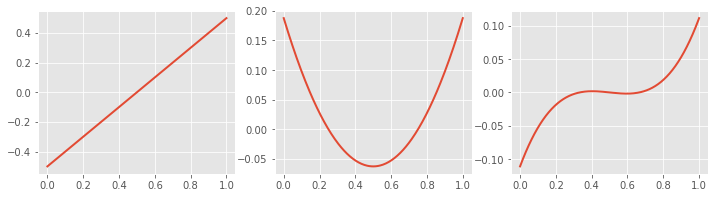

In [29]:
linear = lambda x: x - 0.5
quadratic = lambda x: (x - 0.25)*(x - 0.75)
cubic = lambda x: (x - 0.333)*(x - 0.5)*(x - 0.666)
functions = [linear, quadratic, cubic]

# Set up the grid.
x = np.linspace(0, 1, num=250)

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for f, ax in zip(functions, axs.flatten()):
    ax.plot(x, f(x))

A common issue occurs when the data gets out of order, which turns the line plots into a mess of random points.

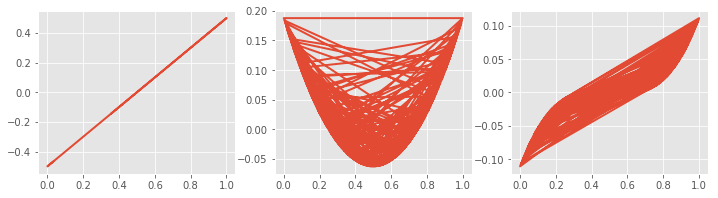

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for f, ax in zip(functions, axs.flatten()):
    np.random.shuffle(x)
    ax.plot(x, f(x))

### Example: Linear Regression Data, Different Slopes, With Lines

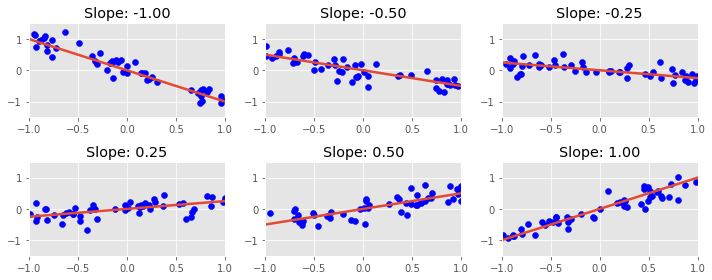

In [31]:
slopes = [-1.0, -0.5, -0.25, 0.25, 0.5, 1.0]
x_linspace = np.linspace(-1, 1, num=250)

fig, axs = plt.subplots(2, 3, figsize=(10, 4))

for i, ax in enumerate(axs.flatten()):
    x = np.random.uniform(-1, 1, size=50)
    y = slopes[i]*x + np.random.normal(scale=0.2, size=50)
    ax.plot(x_linspace, slopes[i]*x_linspace, linewidth=2.5)
    ax.scatter(x, y, color="blue")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title("Slope: {:2.2f}".format(slopes[i]))
    
fig.tight_layout()

### Example: Random Walks

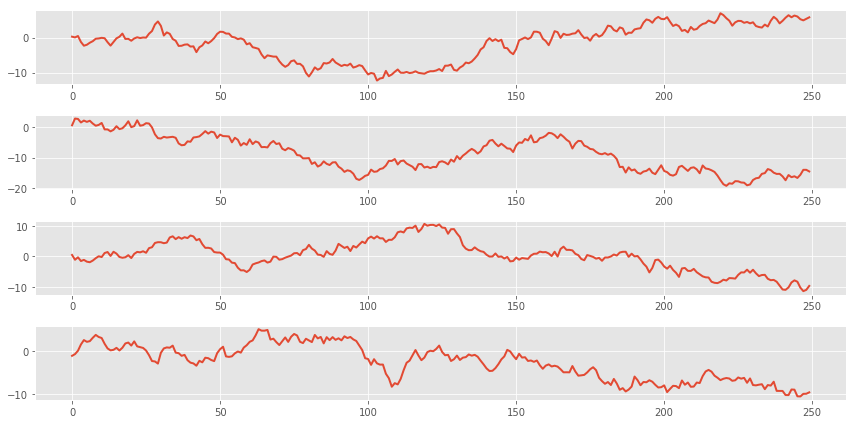

In [32]:
n_walks = 4

fig, axs = plt.subplots(4, figsize=(12, 6))

x = np.arange(250)
for ax in axs.flatten():
    y = np.random.normal(size=250)
    walk = np.cumsum(y)
    ax.plot(x, walk)
    
plt.tight_layout()

## Drawing Bar Charts

A bar chart is useful for comparing the same measurement across multiple categories.

In [33]:
record_counts = pd.DataFrame(
    {'count': [135, 40, 20, 30, 15], 
     'genre': ['rock', 'metal', 'jazz', 'rap', 'classical']}
)

To make a bar chart, we need to:
  - create a sequence of x positions using `np.arange`.
  - Set the x-ticks to the middle of the bars using `ax.set_xticks`.
  - Set the labels of the x-ticks using `ax.set_xtickslabels`.

[Text(0,0,'rock'),
 Text(0,0,'metal'),
 Text(0,0,'jazz'),
 Text(0,0,'rap'),
 Text(0,0,'classical')]

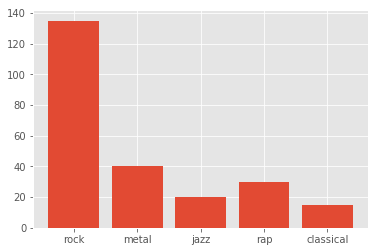

In [34]:
# x will be the left hand edge of the bars.
x = np.arange(len(record_counts['genre']))

fig, ax = plt.subplots()

bars = ax.bar(x, record_counts['count'])
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(record_counts['genre'])

## Modularizing With Functions

When organizing our code, we often would like to break the task of creating a complex figure into subtasks, which we encapsulate in functions.

The main pattern used when creating plots with matplotlib using function is to **pass an axis into the function, then modify the axis**.

This results in functions like:

```python
def add_something_to_a_plot(ax, data_arguments..., style_arguments...)
```

We reccomend:

  - Always making the *first* argument of the function the axis to be modified.
  - Always making the arguments following the axis accept the data needed to add the feature to the plot.
  - Always making the remaining arguments stylistic controls for the plot.
  
Being consistent here will reduce your mental load when using the functions and sharing them with others.

### Example: Two Scatter Plots With a Boundary

Let's break down the process of creating the following plot into a few functions.

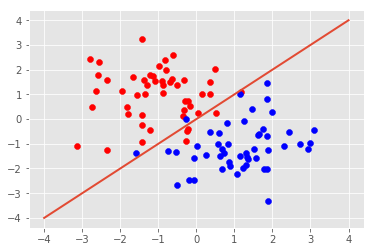

In [35]:
# These will eventually become the arguments to our functions.
red_points_center = (-1, 1)
n_red_points = 50
blue_points_center = (1, -1)
n_blue_points = 50
boundary_line_intercept = 0
boundary_line_slope = 1
boundary_line_range = (-4, 4)

fig, ax = plt.subplots()

# Make the red scatter plot
red_x = np.random.normal(loc=red_points_center[0], size=n_red_points)
red_y = np.random.normal(loc=red_points_center[1], size=n_red_points)
ax.scatter(red_x, red_y, color='red')

# Make the blue scatter plot
blue_x = np.random.normal(loc=blue_points_center[0], size=n_blue_points)
blue_y = np.random.normal(loc=blue_points_center[1], size=n_blue_points)
ax.scatter(blue_x, blue_y, color='blue')

# Make the seperating line
x_linspace = np.linspace(boundary_line_range[0], boundary_line_range[1], num=250)
ax.plot(x_linspace,
        boundary_line_slope*x_linspace + boundary_line_intercept,
        linewidth=2)

The code above works, and is clear enough, but is not at all reusable, so let's break it up into some components.

We will write two functions:
  - One function will draw a scatterplot at a given center, with a given color.
  - One function will draw a line across a given range, with a given intercept and slope.
  
```python
def draw_scatterplot(ax, center, size, color)
def draw_line(ax, x_range, intercept, slope)
```

In [36]:
def draw_scatterplot(ax, center, size, color):
    x = np.random.normal(loc=center[0], size=size)
    y = np.random.normal(loc=center[1], size=size)
    ax.scatter(x, y, color=color)
    
def draw_line(ax, x_range, intercept, slope):
    x = np.linspace(x_range[0], x_range[1], num=250)
    ax.plot(x, slope*x + intercept, linewidth=2)

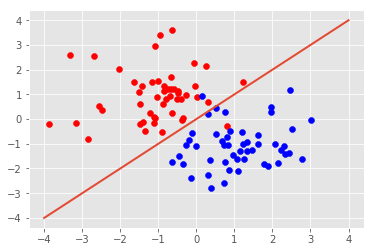

In [37]:
fig, ax = plt.subplots()

draw_scatterplot(ax, (-1, 1), 50, 'red')
draw_scatterplot(ax, (1, -1), 50, 'blue')
draw_line(ax, (-4, 4), 0, 1)

plt.show()

## Shortcuts from Pandas

When your data is in a `pandas.DataFrame`, there are shortcuts available for some common tasks.

In [38]:
golf_df = pd.read_csv('./playgolf.csv', sep='|')

In [39]:
golf_df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play


Calling `DataFrame.plot(kind="whatever")` on any dataframe will make a plot of all the applicable columns.

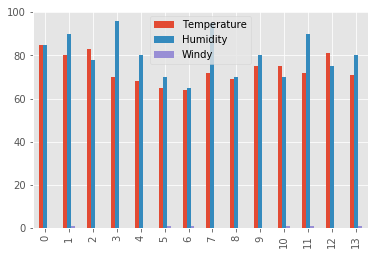

In [40]:
golf_df.plot(kind="bar")

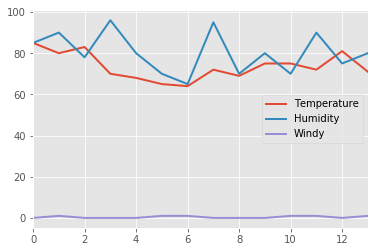

In [41]:
golf_df.plot(kind="line")

These are occasionally useful, but not as much as you would like.

You can get an overall summary by crating a matrix of scatterplots with `scatter_matrix`.

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


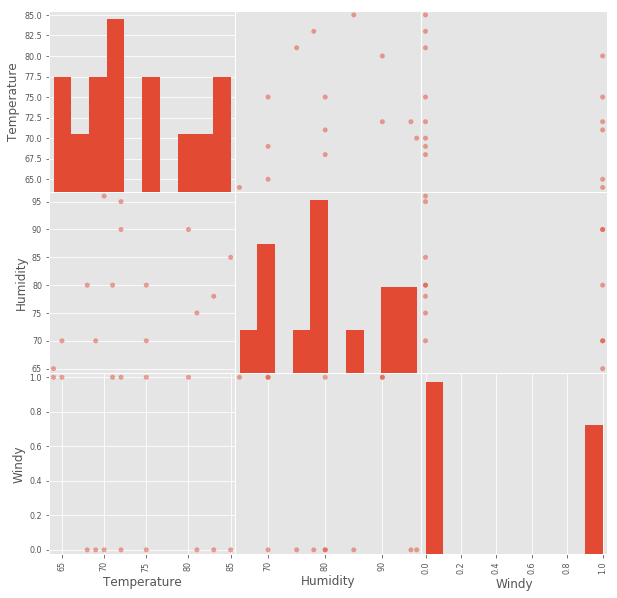

In [42]:
pd.tools.plotting.scatter_matrix(golf_df, figsize=(10, 10), s=100)
plt.show()

Note that the variables with categorical (string) values are ignored, to plot them we need to create new columns with numeric values.

In [43]:
golf_df['ResultNumeric'] = golf_df['Result'] == "Play"
golf_df['OutlookNumeric'] = (
    0*(golf_df['Outlook'] == 'rain') +
    1*(golf_df['Outlook'] == 'overcast') +
    2*(golf_df['Outlook'] == 'sunny')
)

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


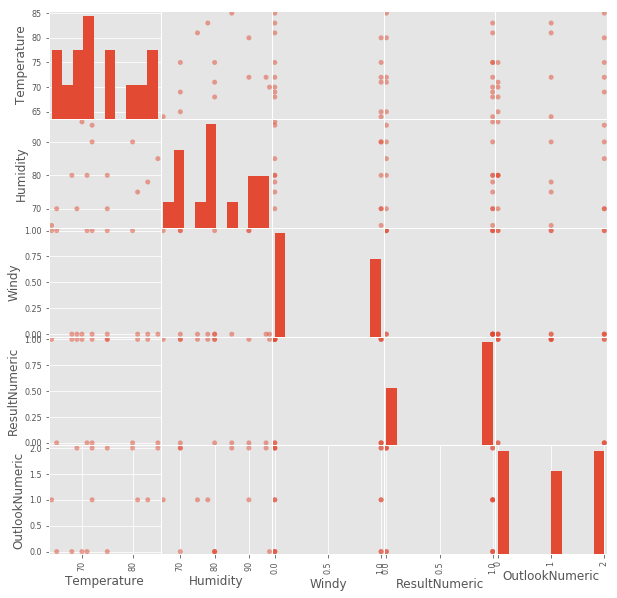

In [44]:
pd.tools.plotting.scatter_matrix(golf_df, figsize=(10, 10), s=100)
plt.show()

As a more difficult application, let's take a look at the counts of each weather scenario.

To create a bar chart of counts, you first need to group by the grouping quantity.

In [45]:
outlook_counts = golf_df.groupby('Outlook').count()
outlook_counts

,Date,Temperature,Humidity,Windy,Result,ResultNumeric,OutlookNumeric
Outlook,,,,,,,
overcast,4,4,4,4,4,4,4
rain,5,5,5,5,5,5,5
sunny,5,5,5,5,5,5,5


The resulting data frame has the counts for each distinct category in each row.  We now only need to grab one column and make a bar chart.

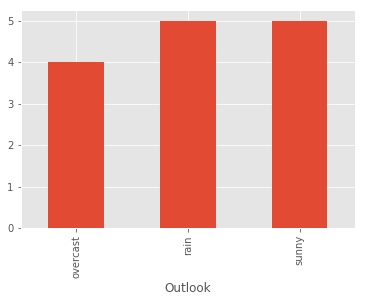

In [46]:
outlook_counts.iloc[:, 0].plot(kind='bar')

Let's see how the temperature changes across different outlooks.  This is a bit harder, and took me some experimentation to get it right.

There are probably easier ways to accomplish this, but it illustrates a few of the ideas we have studied up to this point.

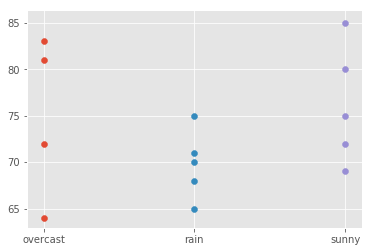

In [47]:
def get_temperature_column(df):
    return df['Temperature']

outlook_groups = golf_df.groupby('Outlook')

fig, ax = plt.subplots()

keys = []  # <- Need to build this in the loop to make sure we get
           #    all the names in the correct order.
for i, (key, group) in enumerate(outlook_groups):
    ax.scatter([i]*len(group), group['Temperature'])
    keys.append(key)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(keys)

plt.show()